## Neccesary Libs

In [2]:
import numpy as np #برای کار با داده های عددی
import pandas as pd #برای پردازش و تحلیل داده
import seaborn as sns #برای رسم نمودار
from sklearn.model_selection import train_test_split #برای تقسیم داده به دوقسمت
from sklearn.ensemble import RandomForestClassifier #مدل جنگل تصادفی
from sklearn.metrics import classification_report #توابع ارزیابی مدل

In [3]:
# خواندن داده‌های فایل اول
df1 = pd.read_csv('H:\\ai\\project\\dataset1.csv')

# خواندن داده‌های فایل دوم
df2 = pd.read_csv('H:\\ai\\project\\dataset2.csv')

# خواندن داده‌های فایل سوم
df3 = pd.read_csv('H:\\ai\\project\\dataset3.csv')

# خواندن داده‌های فایل چهارم
df4 = pd.read_csv('H:\\ai\\project\\dataset4.csv')


# ترکیب داده‌های دو DataFrame
combined_df = pd.concat([df1, df2,df3, df4])

# ذخیره کردن داده‌های ترکیب شده به یک فایل جدید
combined_df.to_csv('H:\\ai\\project\\dataset50.csv', index=False)


## Importing data & Checking it

In [4]:
#وارد کردن داده به برنامه
data1 = pd.read_csv('H:\\ai\\project\\dataset.csv', low_memory=False)
data1.head(200000)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,13,CASH_IN,149024.27,C1446913085,8688.0,157712.27,C476402209,440028.59,321427.51,0,0
199996,13,PAYMENT,71076.01,C1421983410,50291.0,0.00,M855368711,0.00,0.00,0,0
199997,13,CASH_OUT,147125.05,C80624764,0.0,0.00,C747330421,1058502.64,1325544.47,0,0
199998,13,CASH_OUT,97529.67,C595001108,0.0,0.00,C575555170,1921846.97,2019376.64,0,0


In [5]:
# تعداد مقادیر هر ستون و نوع مقادیر
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            200000 non-null  int64  
 1   type            200000 non-null  object 
 2   amount          200000 non-null  float64
 3   nameOrig        200000 non-null  object 
 4   oldbalanceOrg   200000 non-null  float64
 5   newbalanceOrig  200000 non-null  float64
 6   nameDest        200000 non-null  object 
 7   oldbalanceDest  200000 non-null  float64
 8   newbalanceDest  200000 non-null  float64
 9   isFraud         200000 non-null  int64  
 10  isFlaggedFraud  200000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 16.8+ MB


In [6]:
# step -> روز تراکنش
# type -> نوع تراکنش
# amount -> مقدار تراکنش
# nameOrig -> نام حساب مبدا
# oldbalanceOrg -> موجودی حساب مبدا قبل تراکنش
# newbalanceOrig -> موجودی حساب مبدا بعد تراکنش
# nameDest -> نام حساب مقصد        
# oldbalanceDest -> موجودی حساب مقصد قبل تراکنش
# newbalanceDest -> موجودی حساب مقصد بعد تراکنش
# isFraud -> تقلبی بودن یا نبودن تراکنش

In [7]:
# بررسی مقادیر خالی(MissingValues)
data1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Data Analysis

In [8]:
# بررسی مقدارکل پول های ثبت شده توسط هر نوع از تراکنش
data1.groupby('type').sum(numeric_only=True)['amount']

type
CASH_IN     7.531084e+09
CASH_OUT    1.347760e+10
DEBIT       1.514278e+07
PAYMENT     8.844203e+08
TRANSFER    1.425399e+10
Name: amount, dtype: float64

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

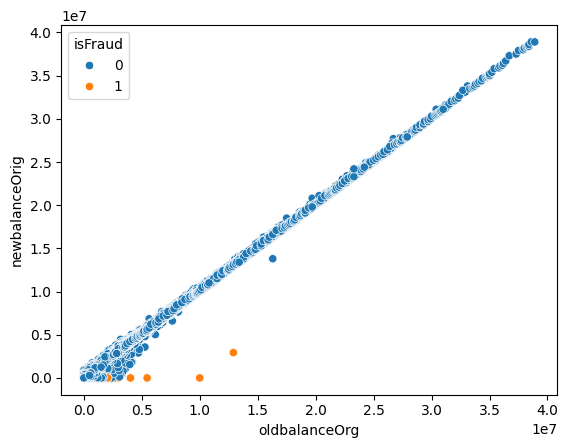

In [9]:
# بررسی ارتباط موجودی حساب مبدا قبل و بعد از تراکنش با بررسی تقلبی بودن یا نبودن آنها
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=data1, hue='isFraud')

In [10]:
# میانگین مقادیر برای دو گروه تراکتش های درست و تقلبی
data1.groupby('isFraud').mean(numeric_only=True)[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,
0,180476.435230,882375.600788,900833.917421,941695.377654,1.192262e+06
1,635893.197211,628785.862925,22947.864694,220435.975782,6.866950e+05


In [11]:
# تعداد کل تراکنش های هر گروه از تراکنش ها
typ = data1['type'].value_counts()
typ

type
PAYMENT     73427
CASH_OUT    66488
CASH_IN     41579
TRANSFER    16836
DEBIT        1670
Name: count, dtype: int64

<Axes: xlabel='type'>

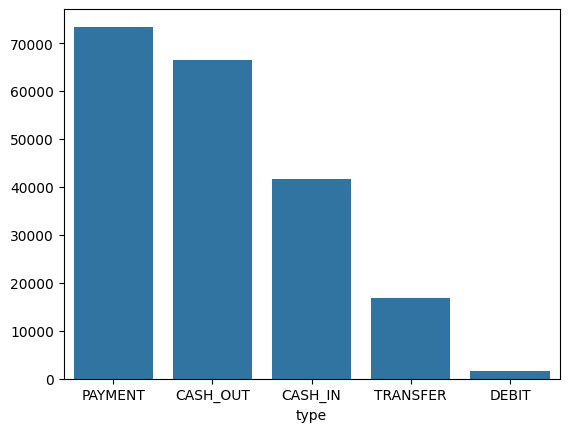

In [12]:
# رسم مقادیر سلول قبل روی نمودار
sns.barplot(x=typ.index, y=typ.values)

In [13]:
# بررسی ارتباط آماری هر ویژگی داده با تقلبی بودن یا نبودنش
correlation = data1.corr(numeric_only=True)
correlation['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.037494
oldbalanceOrg    -0.002484
newbalanceDest   -0.005160
oldbalanceDest   -0.008237
newbalanceOrig   -0.008486
step             -0.039102
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

## Preprocessing data

In [14]:
# تبدیل مقادیر متنی نوع تراکنش به مقادیر عددی
data1['type'] = data1['type'].map({'PAYMENT':1, 'CASH_OUT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
X = data1[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = data1['isFraud']

In [16]:
# جدا کردن داده به دو قسمت آموزشی و تستی با نسبت 20 درصد
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

## Training Model

In [17]:
# ایجاد مدل جنگل تصادفی و آموزش آن با 100 درخت
model = RandomForestClassifier(n_estimators=100, random_state=69)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

## Evaluating Model

In [18]:
y_pred = model.predict(X_test)

In [19]:
# ارزیابی درصد جواب های درست مدل برای داده تستی
model.score(X_test, y_test)

0.99935

In [20]:
# ارزیابی جامع عملکرد مدل
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39968
           1       0.65      0.41      0.50        32

    accuracy                           1.00     40000
   macro avg       0.82      0.70      0.75     40000
weighted avg       1.00      1.00      1.00     40000



In [21]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# تشخیص متن از عکس
def image_to_text(image_path):
    # خواندن عکس
    image = cv2.imread(image_path)

    # تبدیل تصویر به متن با استفاده از Tesseract
    text = pytesseract.image_to_string(image, lang='eng')

    return text

# مسیر فایل تصویر خود را وارد کنید
image_path = "C:\\Users\\asan\\Desktop\\23.png"

# تبدیل عکس به متن
p = image_to_text(image_path)

print(p)


type CASH_IN CASH_IN
step 1.000000 0.022373

amount 0.022373 1.000000
oldbalanceOrg -0.010058 -0.002762
newbalanceOrig 0.010299 -0.007861
oldbalanceDest 0.027665 0.294137
newbalanceDest 0.025888 0.459304
isFraud 0.031578 0.076688

isFlaggedFraud 0.003277 0.012295



'PAYMENT':1, 'CASH_OUT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5

In [22]:
sentence =p
def replace_words(sentence, old_word, new_word):
    new_sentence = sentence.replace(old_word, new_word)
    return new_sentence


old_word = "PAYMENT"
new_word ="1"


u = replace_words(sentence, old_word, new_word)


In [23]:
sentence =u
def replace_words(sentence, old_word, new_word):
    new_sentence = sentence.replace(old_word, new_word)
    return new_sentence

old_word = "CASH_OUT"
new_word = "2"

o = replace_words(sentence, old_word, new_word)


In [24]:
sentence =o
def replace_words(sentence, old_word, new_word):
    new_sentence = sentence.replace(old_word, new_word)
    
    return new_sentence



old_word ="CASH_IN"
new_word = "3"


k = replace_words(sentence, old_word, new_word)
print(k)

type 3 3
step 1.000000 0.022373

amount 0.022373 1.000000
oldbalanceOrg -0.010058 -0.002762
newbalanceOrig 0.010299 -0.007861
oldbalanceDest 0.027665 0.294137
newbalanceDest 0.025888 0.459304
isFraud 0.031578 0.076688

isFlaggedFraud 0.003277 0.012295



In [25]:
sentence =k
def replace_words(sentence, old_word, new_word):
    new_sentence = sentence.replace(old_word, new_word)
    return new_sentence


old_word = "TRANSFER"
new_word = "4"


l = replace_words(sentence, old_word, new_word)
print(l)

type 3 3
step 1.000000 0.022373

amount 0.022373 1.000000
oldbalanceOrg -0.010058 -0.002762
newbalanceOrig 0.010299 -0.007861
oldbalanceDest 0.027665 0.294137
newbalanceDest 0.025888 0.459304
isFraud 0.031578 0.076688

isFlaggedFraud 0.003277 0.012295



In [26]:
print(l)

type 3 3
step 1.000000 0.022373

amount 0.022373 1.000000
oldbalanceOrg -0.010058 -0.002762
newbalanceOrig 0.010299 -0.007861
oldbalanceDest 0.027665 0.294137
newbalanceDest 0.025888 0.459304
isFraud 0.031578 0.076688

isFlaggedFraud 0.003277 0.012295



In [27]:
import re

def count_numbers_in_sentence(sentence):
    numbers = re.findall(r"[-+]?\d*\.\d+|[-+]?\d+", sentence)  # پیدا کردن تمام اعداد (صحیح و اعشاری) در جمله
    return len(numbers)

sentence = l
count = count_numbers_in_sentence(sentence)
print("تعداد اعداد متن:", count)


def count_words_without_numbers(sentence):
    words = re.findall(r'\b[a-zA-Z]+\b', sentence)
    return len(words)

sentence = l
word_count = count_words_without_numbers(sentence)
print(f"Number of words without numbers: {word_count}")



تعداد اعداد متن: 18
Number of words without numbers: 9


In [43]:
z=1 #شماره ستون جهت نمایش#
x=int (count/word_count)
my_list = []
for j in range(2): 
    

    sentence =" type	amount	oldbalanceOrg	newbalanceOrig	"
    words_list = sentence.split()
    #print(words_list)
    #print()
    
    for word in words_list:
    
        #print(word)
        #print()

        text = l
        words = text.split()
        #print(l)
        for i in range(len(words)):
            if words[i] == word:
                if i < len(words) - 1:
                    #print(words[i + 1])
                


                

                
                    value = words[i+j+1]
 

                    my_list.append(value)
                
                    break
        else:
                print("null")
#var1, var2, var3, var4= my_list       
#print(var1)
#print(var2)
#print(var3)
#print(var4)







def chunk_list(lst, chunk_size):
    return [lst[i:i + chunk_size] for i in range(0, len(lst), chunk_size)]

# لیست اصلی
my_list1 = my_list

# تقسیم به چند لیست مجزا (به صورت نمونه به لیست‌های دوگانه)
chunk_size = 4
result = chunk_list(my_list1, chunk_size)

#print(result)



#x=int(input("nuber of soton"))
thislist = result




var1, var2, var3, var4= thislist[z]
print(var1)
print(var2)
print(var3)
print(var4)



3
1.000000
-0.002762
-0.007861


In [44]:
y_pred = model.predict([[var1,var2,var3,var4]])
y_pred

c:\Users\asan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Mahdi Mahmoudi

